In [1]:
import sys, os
import pandas as pd


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.gene import get_gene_bnum
pd.options.display.max_columns = 100

In [2]:
tu_objects_df = pd.read_csv(
    "./data/RegulonDB10/tu_objects_tmp.txt",
    sep="\t",
    comment='#',
    header=None,
)

tu_objects_df.columns = [
    "TRANSCRIPTION_UNIT_ID",
    "NUMTU",
    "TU_POSLEFT",
    "TU_POSRIGHT",
    "TU_TYPE",
    "TU_OBJECT_CLASS",
    "TU_OBJECT_ID",
    "TU_OBJECT_NAME",
    "TU_OBJECT_POSLEFT",
    "TU_OBJECT_POSRIGHT",
    "TU_OBJECT_STRAND",
    "TU_OBJECT_COLORCLASS",
    "TU_OBJECT_DESCRIPTION",
    "TU_OBJECT_SIGMA",
    "TU_OBJECT_EVIDENCE",
    "TU_OBJECT_RI_TYPE",
    "TU_OBJECT_TYPE",
    "EVIDENCE"
]
tu_objects_df.head()

,TRANSCRIPTION_UNIT_ID,NUMTU,TU_POSLEFT,TU_POSRIGHT,TU_TYPE,TU_OBJECT_CLASS,TU_OBJECT_ID,TU_OBJECT_NAME,TU_OBJECT_POSLEFT,TU_OBJECT_POSRIGHT,TU_OBJECT_STRAND,TU_OBJECT_COLORCLASS,TU_OBJECT_DESCRIPTION,TU_OBJECT_SIGMA,TU_OBJECT_EVIDENCE,TU_OBJECT_RI_TYPE,TU_OBJECT_TYPE,EVIDENCE
0,ECK120008913,3,1825955,1832013,H,PM,ECK120009851,astCp1,1832013,1832013,R,NaN,NaN,Sigma70,Human inference of promoter position,NaN,predicted,NaN
1,ECK120008913,3,1825955,1832013,H,GN,ECK120003528,astE,1825955,1826923,R,"51,153,255",amino acids,NaN,NaN,NaN,predicted,NaN
2,ECK120008913,3,1825955,1832013,H,GN,ECK120003529,astB,1826916,1828259,R,"51,153,255",amino acids,NaN,NaN,NaN,predicted,NaN
3,ECK120008913,3,1825955,1832013,H,GN,ECK120003532,astC,1830762,1831982,R,"0,0,255",nitrogen metabolism,NaN,NaN,NaN,predicted,NaN
4,ECK120008913,3,1825955,1832013,H,GN,ECK120003530,astD,1828256,1829734,R,"51,153,255",amino acids,NaN,NaN,NaN,predicted,NaN


In [3]:
gene_synonym_df = pd.read_csv(
    "./data/RegulonDB10/object_synonym.txt",
    sep="\t",
    comment='#',
    header=None,
    quoting=3
)
gene_synonym_df.columns = ["OBJECT_ID", "OBJECT_SYNONYM_NAME", "OS_INTERNAL_COMMENT", "KEY_ID_ORG"]
gene_synonym_df.head()

,OBJECT_ID,OBJECT_SYNONYM_NAME,OS_INTERNAL_COMMENT,KEY_ID_ORG
0,ECK120000001,EG10001,NaN,ECK12
1,ECK120000001,ECK4045,NaN,ECK12
2,ECK120000001,b4053,NaN,ECK12
3,ECK120000001,alr5,NaN,ECK12
4,ECK120000002,b0764,NaN,ECK12


In [4]:
TU_genes_COGs_df = tu_objects_df[tu_objects_df.TU_OBJECT_CLASS=="GN"].copy()
TU_genes_COGs_df["TU_LENGTH"] = TU_genes_COGs_df.apply(lambda r: r["TU_POSRIGHT"] - r["TU_POSLEFT"] + 1, axis=1)
TU_genes_COGs_df["GENE_LEN"] = TU_genes_COGs_df.apply(lambda r: r.TU_OBJECT_POSRIGHT - r.TU_OBJECT_POSLEFT + 1, axis=1)
TU_genes_COGs_df["bnum"] = TU_genes_COGs_df.apply(lambda row: get_gene_bnum(row["TU_OBJECT_ID"], gene_synonym_df) if row["TU_OBJECT_CLASS"] == "GN" else "", axis=1)

# Remove most columns to ensure that dropping duplicates won't be effected by any unnecessary annotations
TU_genes_COGs_df = TU_genes_COGs_df[["TRANSCRIPTION_UNIT_ID", "TU_LENGTH", "GENE_LEN", "bnum",
                          "TU_POSLEFT", "TU_POSRIGHT"]]  # need these for figuring out the length of the genome with unknown TUs below

TU_genes_COGs_df = TU_genes_COGs_df.drop_duplicates()
TU_genes_COGs_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,GENE_LEN,bnum,TU_POSLEFT,TU_POSRIGHT
1,ECK120008913,6059,969,b1744,1825955,1832013
2,ECK120008913,6059,1344,b1745,1825955,1832013
3,ECK120008913,6059,1221,b1748,1825955,1832013
4,ECK120008913,6059,1479,b1746,1825955,1832013
5,ECK120008913,6059,1035,b1747,1825955,1832013
...,...,...,...,...,...,...
28522,ECK125257178,551,534,b1045,1105803,1106353
28528,ECK125257179,1313,945,b0076,84000,85312
28535,ECK125257180,1153,312,b1044,1105201,1106353
28536,ECK125257180,1153,534,b1045,1105201,1106353


In [5]:
gene_COG_df = pd.read_csv("./data/cogs_ecoli_mg1655.csv", encoding = "ISO-8859-1")
gene_COG_df.head()

,GI,gene,locus,COG ID,COG category,COG name,COG category primary,COG class,COG description
0,16127996,thrA,b0002,COG0460,E,Homoserine dehydrogenase,E,METABOLISM,Amino acid transport and metabolism
1,16131778,metL,b3940,COG0460,E,Homoserine dehydrogenase,E,METABOLISM,Amino acid transport and metabolism
2,16127996,thrA,b0002,COG0527,E,Aspartokinase,E,METABOLISM,Amino acid transport and metabolism
3,16131778,metL,b3940,COG0527,E,Aspartokinase,E,METABOLISM,Amino acid transport and metabolism
4,16131850,lysC,b4024,COG0527,E,Aspartokinase,E,METABOLISM,Amino acid transport and metabolism


In [6]:
# Has to be a set since a single gene can belong to multiple COGs
def get_COG_description_set(bnum):
    COG_descript_set = set()
    df = gene_COG_df[gene_COG_df["locus"]==bnum]
    for COG in df["COG description"]:
        COG_descript_set.add(COG)
    return COG_descript_set


TU_genes_COGs_df["COG description"] = TU_genes_COGs_df.bnum.apply(lambda bnum: get_COG_description_set(bnum))
TU_genes_COGs_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,GENE_LEN,bnum,TU_POSLEFT,TU_POSRIGHT,COG description
1,ECK120008913,6059,969,b1744,1825955,1832013,{Amino acid transport and metabolism}
2,ECK120008913,6059,1344,b1745,1825955,1832013,{Amino acid transport and metabolism}
3,ECK120008913,6059,1221,b1748,1825955,1832013,{Amino acid transport and metabolism}
4,ECK120008913,6059,1479,b1746,1825955,1832013,{Energy production and conversion}
5,ECK120008913,6059,1035,b1747,1825955,1832013,{Amino acid transport and metabolism}
...,...,...,...,...,...,...,...
28522,ECK125257178,551,534,b1045,1105803,1106353,"{Translation, ribosomal structure and biogenesis}"
28528,ECK125257179,1313,945,b0076,84000,85312,{Transcription}
28535,ECK125257180,1153,312,b1044,1105201,1106353,{}
28536,ECK125257180,1153,534,b1045,1105201,1106353,"{Translation, ribosomal structure and biogenesis}"


In [7]:
tu_cogs_df = TU_genes_COGs_df.copy()
tu_cogs_df = tu_cogs_df.drop(['GENE_LEN', "bnum", "COG description"], axis=1)
tu_cogs_df = tu_cogs_df.drop_duplicates()


def get_COGs_from_TU_ID(TU_ID):
    COG_set = set()
    df = TU_genes_COGs_df[TU_genes_COGs_df.TRANSCRIPTION_UNIT_ID==TU_ID]
    for COGs in df["COG description"]:
        COG_set = COG_set | COGs
    return COG_set


tu_cogs_df["COG description"] = tu_cogs_df.TRANSCRIPTION_UNIT_ID.apply(lambda TU_ID: str(get_COGs_from_TU_ID(TU_ID)))  # Turn sets into string so that can use .str.contains in the following cell
tu_cogs_df
# display(len(tu_cogs_df), len(tu_cogs_df.TRANSCRIPTION_UNIT_ID.unique()))  # If the numbers are the same, then the TUs in the DF are unique

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,TU_POSLEFT,TU_POSRIGHT,COG description
1,ECK120008913,6059,1825955,1832013,"{'Amino acid transport and metabolism', 'Energ..."
13,ECK120008914,6373,1825955,1832327,"{'Amino acid transport and metabolism', 'Energ..."
39,ECK120008915,6085,1825955,1832039,"{'Amino acid transport and metabolism', 'Energ..."
56,ECK120008916,3876,2800586,2804461,"{'Nucleotide transport and metabolism', 'Postt..."
77,ECK120008917,662,4105726,4106387,"{'Posttranslational modification, protein turn..."
...,...,...,...,...,...
28510,ECK125257177,2576,1105201,1107776,"{'Translation, ribosomal structure and biogene..."
28522,ECK125257178,551,1105803,1106353,"{'Translation, ribosomal structure and biogene..."
28528,ECK125257179,1313,84000,85312,{'Transcription'}
28535,ECK125257180,1153,1105201,1106353,"{'Translation, ribosomal structure and biogene..."


In [8]:
def get_COG_length(cog_descript):
    COG_length = 0
    specific_COG_TU_DF = tu_cogs_df[tu_cogs_df["COG description"].str.contains(cog_descript)]
    COG_length += specific_COG_TU_DF.TU_LENGTH.sum()
    
    # substract gene lengths of these TUs that don't belong to this COG.
    for COG_TU_ID in specific_COG_TU_DF.TRANSCRIPTION_UNIT_ID:
        df = TU_genes_COGs_df[TU_genes_COGs_df.TRANSCRIPTION_UNIT_ID==COG_TU_ID]
        for _, gene in df.iterrows():
            if cog_descript not in gene['COG description']:
                COG_length -= gene.GENE_LEN            
        
    return COG_length


cog_len_df = pd.DataFrame(gene_COG_df["COG description"].unique(), columns=["COG description"])  # Create blank DF with all COGs.
cog_len_df["COG length"] = cog_len_df["COG description"].apply(get_COG_length)
cog_len_df

,COG description,COG length
0,Amino acid transport and metabolism,660007
1,Inorganic ion transport and metabolism,305849
2,Carbohydrate transport and metabolism,679809
3,Coenzyme transport and metabolism,212728
4,Energy production and conversion,589566
5,Function unknown,182702
6,"Posttranslational modification, protein turnov...",270912
7,"Mobilome: prophages, transposons",28915
8,Transcription,424603
9,"Translation, ribosomal structure and biogenesis",393020


In [9]:
# Gets the length of each TU that doesn't have an unknown COG (has a known COG)

tu_known_COG_df = tu_cogs_df[
    (tu_cogs_df["COG description"] != "set()")
    & (tu_cogs_df["COG description"] != "{'Function unknown'}")
].copy()
tu_known_COG_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,TU_POSLEFT,TU_POSRIGHT,COG description
1,ECK120008913,6059,1825955,1832013,"{'Amino acid transport and metabolism', 'Energ..."
13,ECK120008914,6373,1825955,1832327,"{'Amino acid transport and metabolism', 'Energ..."
39,ECK120008915,6085,1825955,1832039,"{'Amino acid transport and metabolism', 'Energ..."
56,ECK120008916,3876,2800586,2804461,"{'Nucleotide transport and metabolism', 'Postt..."
77,ECK120008917,662,4105726,4106387,"{'Posttranslational modification, protein turn..."
...,...,...,...,...,...
28498,ECK125257176,3140,3336963,3340102,"{'Cell wall/membrane/envelope biogenesis', 'Li..."
28510,ECK125257177,2576,1105201,1107776,"{'Translation, ribosomal structure and biogene..."
28522,ECK125257178,551,1105803,1106353,"{'Translation, ribosomal structure and biogene..."
28528,ECK125257179,1313,84000,85312,{'Transcription'}


In [10]:
# Since counting COG "lengths" with TU lengths, all parts of the genome without TUs are considered "unknown" for COGs.
# Could be faster
all_tu_pos_set = set()
for idx, tu_row in tu_known_COG_df.iterrows():
    tu_pos = set(range(tu_row["TU_POSLEFT"], tu_row["TU_POSRIGHT"] + 1))
    all_tu_pos_set = all_tu_pos_set.union(tu_pos)
display(len(all_tu_pos_set))

3893592

In [11]:
unknown_COG_pos_set = set(range(1 ,4641653 + 1)).difference(all_tu_pos_set)
unknown_COG_nuc_len = len(unknown_COG_pos_set)
cog_len_df = cog_len_df.set_index("COG description")
cog_len_df.loc["Function unknown"]["COG length"] = unknown_COG_nuc_len  # There already existed an entry. Just overwriting it.
cog_len_df

,COG length
COG description,
Amino acid transport and metabolism,660007
Inorganic ion transport and metabolism,305849
Carbohydrate transport and metabolism,679809
Coenzyme transport and metabolism,212728
Energy production and conversion,589566
Function unknown,748061
"Posttranslational modification, protein turnover, chaperones",270912
"Mobilome: prophages, transposons",28915
Transcription,424603


In [12]:
cog_len_df.to_pickle("./data/COG_len_df.pkl")

In [13]:
E_COLI_GENOME_LEN = 4641653
unknown_pos_set = set(range(1 ,E_COLI_GENOME_LEN+1)).difference(all_tu_pos_set)
unknown_nuc_len = len(unknown_pos_set)
COG_genome_cov = 1-(unknown_nuc_len/E_COLI_GENOME_LEN)

import pickle
with open("./data/COG_genome_coverage.pkl", 'wb') as f:
    pickle.dump(COG_genome_cov, f)

(0, 1)

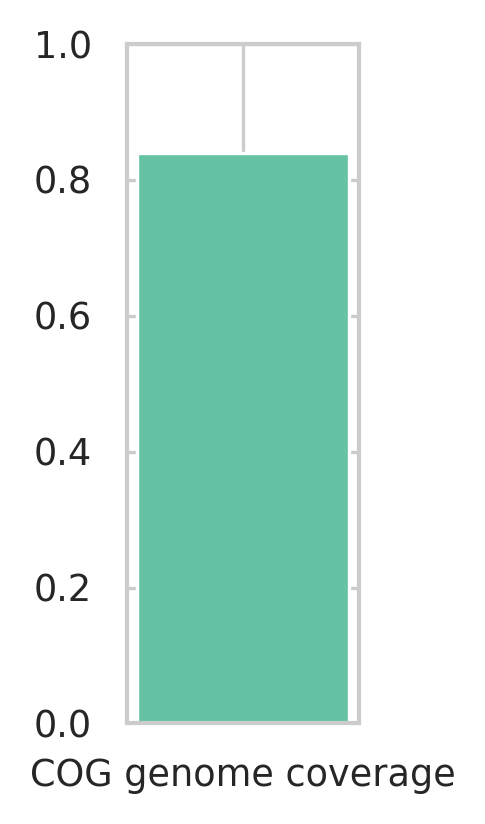

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")


plt.figure(figsize=(1,3))
plt.bar('COG genome coverage',
        COG_genome_cov,
        width=[0.1]
       )
plt.ylim(0, 1)